# Retrospective analysis of a fairness violation in an income classification pipeline

When screening our [ML pipeline for income classification](https://github.com/schelterlabs/arguseyes-example/blob/main/pipelines/openml-classification-incomelevel.py) on Github with this [configuration](https://github.com/schelterlabs/arguseyes-example/blob/main/openml-classification-incomelevel-fairness.yaml), ArgusEyes detects a **fairness violation** in the pipeline. 

The screenshot shows the result of the [screening during the build triggered by a Github action](https://github.com/schelterlabs/arguseyes-example/actions/runs/3523396218/jobs/5907507086): The **classifier treats data from non-male person disparately unfair**, with respect to given threshold on the equal opportunity metric.

In the following, we show how to **leverage ArgusEyes to retrospectively analyze the pipeline run** (based on metadata and captured data artifacts), and **figure out the root cause of the data leakage issue**.

![data-leakage-screening-via-a-github-action](github-action-fairness-screening.png)

In [1]:
from arguseyes.retrospective import PipelineRun, FairnessRetrospective

run = PipelineRun(run_id='1bb75c7a0b3643e6954e5ca15e46f057')

In [2]:
run.explore_data()

# Pipeline Data Explorer

In [4]:
retrospective = FairnessRetrospective(run)

In [5]:
retrospective.fairness_criteria()

{('race', 'white'), ('sex', 'male')}

In [6]:
retrospective.show_confusion_matrix('sex', 'male')

,positive prediction,negative prediction,
positive label,TP=179,FN=206,385
negative label,FP=166,TN=813,979
,345,1019,
,positive prediction,negative prediction,
positive label,TP=141,FN=151,292
negative label,FP=121,TN=421,542
,262,572,


In [7]:
retrospective.fairness_metrics('sex', 'male')

{'predictive_parity': -0.019327359221152696,
 'equal_opportunity': -0.017941647393702187,
 'statistical_parity': -0.061216129735507774}

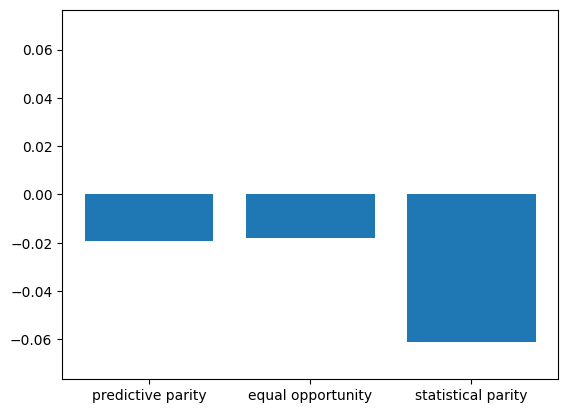

In [8]:
retrospective.plot_fairness_metrics('sex', 'male')

In [9]:
retrospective.show_confusion_matrix('race', 'white')

,positive prediction,negative prediction,
positive label,TP=272,FN=294,566
negative label,FP=228,TN=943,1171
,500,1237,
,positive prediction,negative prediction,
positive label,TP=48,FN=63,111
negative label,FP=59,TN=291,350
,107,354,


In [10]:
retrospective.fairness_metrics('race', 'white')

{'predictive_parity': 0.09540186915887855,
 'equal_opportunity': 0.0481329385923025,
 'statistical_parity': 0.05574849798378281}

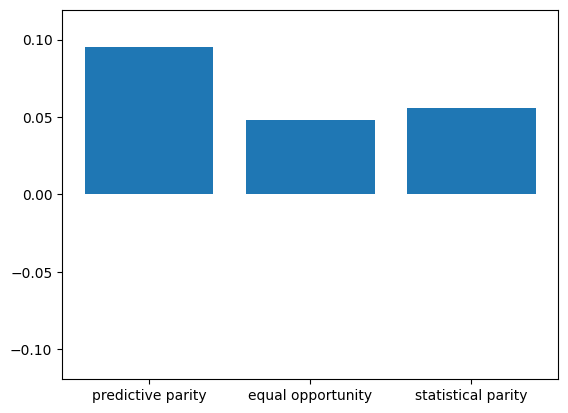

In [11]:
retrospective.plot_fairness_metrics('race', 'white')